Drought is an insidious natural hazard that results from a deficiency of precipitation from expected or “normal” that, when extended over a season or longer period of time, is insufficient to meet the demands of human activities and the environment. Drought has had a significant impact on agriculture. The increasing frequency and magnitude of droughts in recent decades and the mounting losses from extended droughts in the agricultural sector emphasize the need for assigning an urgent priority to addressing the issue of agricultural droughts.

There are quite a few of drought indices currently used around the world for agricultural drought(see Dalezios et al., 2017). These indices could be grouped in seven distinct categories:

1. *precipitation-based indices*;
2. temperature-based indices;
3. precipitation- and temperature-based indices;
4. indices based on precipitation, temperature, and soil moisture/soil characteristics;
5. indices based on precipitation, temperature, relative humidity, solar radiation, wind speed, and soil moisture/soil characteristics;
6. indices based on remote sensing;
7. indices based on a composite approach (multiple indicators/indices).

**Precipitation-based indices**

*Precipitation-based indices* are generally considered as the simplest indices because they are calculated solely based on long-term rainfall records that are often available.

The mostly used precipitation-based indices consist of

* Decile Index (DI)
* Hutchinson Drought Severity Index (HDSI)
* Percen of Normal Index (PNI)
* Z-Score Index (ZSI)
* China-Z Index (CZI)
* Modified China-Z Index (MCZI)
* Rainfall Anomaly Index (RAI)
* Effective Drought Index (EDI)

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
import pandas as pd
import scipy.stats as st

In [116]:
df = pd.read_csv('drought2012-2023.csv')

In [117]:
df.head()

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,...,S60NO,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD
0,2012,1,1,ACME,54.16,31.71,42.35,30.33,16.05,24.39,...,-999.0,-999.0,1.5364,0.0,1.4526,0.0,1.7743,0.0,-999.0,-999.0
1,2012,1,1,ADAX,55.78,34.42,44.48,32.55,17.12,24.95,...,-999.0,-999.0,1.4050,0.0,1.5394,0.0,-996.0000,48.0,-999.0,-999.0
2,2012,1,1,ALTU,53.19,31.49,41.37,29.75,13.47,23.10,...,-999.0,-999.0,-996.0000,48.0,-996.0000,48.0,-996.0000,48.0,-999.0,-999.0
3,2012,1,1,ALVA,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,...,-999.0,-999.0,-999.0000,-999.0,-999.0000,-999.0,-999.0000,-999.0,-999.0,-999.0
4,2012,1,1,ALV2,50.58,26.41,38.55,28.05,18.69,23.69,...,-999.0,-999.0,1.4445,0.0,1.4510,0.0,-996.0000,48.0,-999.0,-999.0


In [118]:
df['STID'].unique()

array(['ACME', 'ADAX', 'ALTU', 'ALVA', 'ALV2', 'ANTL', 'ANT2', 'APAC',
       'ARDM', 'ARD2', 'ARNE', 'BEAV', 'BEEX', 'BESS', 'BIXB', 'BLAC',
       'BOIS', 'BOWL', 'BREC', 'BRIS', 'BBOW', 'BROK', 'BUFF', 'BURB',
       'BURN', 'BUTL', 'BYAR', 'CALV', 'CAMA', 'CATO', 'CENT', 'CHAN',
       'CHER', 'CHEY', 'CHIC', 'CLAR', 'CLRM', 'CLAY', 'CLOU', 'COOK',
       'COPA', 'DURA', 'ELRE', 'ELKC', 'ERIC', 'EUFA', 'EVAX', 'FAIR',
       'FITT', 'FORA', 'FREE', 'FTCB', 'GOOD', 'GRAN', 'GRA2', 'GUTH',
       'HASK', 'HECT', 'HINT', 'HOBA', 'HOLD', 'HOLL', 'HOOK', 'HUGO',
       'IDAB', 'INOL', 'JAYX', 'KENT', 'KETC', 'KING', 'KIN2', 'LAHO',
       'CARL', 'LANE', 'MADI', 'MANG', 'MARE', 'MARS', 'MRSH', 'MAYR',
       'MCAL', 'MEDF', 'MEDI', 'MIAM', 'MINC', 'MTHE', 'NEWK', 'NEWP',
       'NINN', 'NORM', 'NRMN', 'NOWA', 'OILT', 'OKCE', 'OKCN', 'OKCW',
       'OKEM', 'OKMU', 'PAUL', 'PAWN', 'PERK', 'PORT', 'PRES', 'PRYO',
       'PUTN', 'REDR', 'RETR', 'RING', 'SALL', 'SEIL', 'SEMI', 'SHAW',
      

In [119]:
df['STID'].nunique()

143

In [120]:
df.describe()

,YEAR,MONTH,DAY,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,HMAX,...,S60NO,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD
count,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,...,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.0,556986.0
mean,2016.841354,6.397438,15.725857,-103.841961,-123.697916,-114.054836,-125.226297,-135.496659,-130.208663,-92.978553,...,-28.488964,-289.530308,-234.837204,-158.064752,-268.349101,-156.126667,-439.134666,-147.876358,-999.0,-999.0
std,3.082613,3.422973,8.798002,397.975059,389.152320,393.417319,395.830923,391.267489,393.614556,407.305623,...,737.103450,478.181291,425.277438,369.170055,444.162477,370.127622,496.231539,374.031456,0.0,0.0
min,2012.000000,1.000000,1.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.0,-999.0
25%,2014.000000,3.000000,8.000000,47.390000,24.760000,36.380000,29.200000,15.510000,22.780000,74.560000,...,-999.000000,-999.000000,1.378400,0.000000,-996.000000,0.000000,-996.000000,0.000000,-999.0,-999.0
50%,2017.000000,6.000000,16.000000,69.280000,43.590000,56.050000,50.810000,34.880000,42.900000,91.160000,...,102.000000,0.000000,1.598700,0.000000,1.517500,0.000000,1.410300,0.000000,-999.0,-999.0
75%,2019.000000,9.000000,23.000000,85.600000,63.230000,73.770000,67.010000,56.280000,62.020000,97.380000,...,288.000000,0.000000,2.216900,0.000000,2.154000,0.000000,1.960400,48.000000,-999.0,-999.0
max,2022.000000,12.000000,31.000000,114.980000,89.010000,99.420000,84.250000,75.420000,79.060000,100.000000,...,999.000000,96.000000,4.086400,48.000000,4.090500,48.000000,4.085400,48.000000,-999.0,-999.0


In [121]:
# import pandas as pd

# def remove_outliers(df,columns,n_std):
#     for col in columns:
#         print('Working on column: {}'.format(col))
        
#         mean = df[col].mean()
#         sd = df[col].std()
        
#         df = df[(df[col] <= mean+(n_std*sd))]
        
#     return df

In [122]:
df.describe()

,YEAR,MONTH,DAY,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,HMAX,...,S60NO,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD
count,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,556987.000000,...,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.000000,556986.0,556986.0
mean,2016.841354,6.397438,15.725857,-103.841961,-123.697916,-114.054836,-125.226297,-135.496659,-130.208663,-92.978553,...,-28.488964,-289.530308,-234.837204,-158.064752,-268.349101,-156.126667,-439.134666,-147.876358,-999.0,-999.0
std,3.082613,3.422973,8.798002,397.975059,389.152320,393.417319,395.830923,391.267489,393.614556,407.305623,...,737.103450,478.181291,425.277438,369.170055,444.162477,370.127622,496.231539,374.031456,0.0,0.0
min,2012.000000,1.000000,1.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.0,-999.0
25%,2014.000000,3.000000,8.000000,47.390000,24.760000,36.380000,29.200000,15.510000,22.780000,74.560000,...,-999.000000,-999.000000,1.378400,0.000000,-996.000000,0.000000,-996.000000,0.000000,-999.0,-999.0
50%,2017.000000,6.000000,16.000000,69.280000,43.590000,56.050000,50.810000,34.880000,42.900000,91.160000,...,102.000000,0.000000,1.598700,0.000000,1.517500,0.000000,1.410300,0.000000,-999.0,-999.0
75%,2019.000000,9.000000,23.000000,85.600000,63.230000,73.770000,67.010000,56.280000,62.020000,97.380000,...,288.000000,0.000000,2.216900,0.000000,2.154000,0.000000,1.960400,48.000000,-999.0,-999.0
max,2022.000000,12.000000,31.000000,114.980000,89.010000,99.420000,84.250000,75.420000,79.060000,100.000000,...,999.000000,96.000000,4.086400,48.000000,4.090500,48.000000,4.085400,48.000000,-999.0,-999.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556987 entries, 0 to 556986
Columns: 118 entries, YEAR to R75BD
dtypes: float64(101), int64(16), object(1)
memory usage: 501.4+ MB


## Replacing Outlier Observations to 0

In [124]:
# Loop through each column
for col in df.select_dtypes(include=['number']).columns:
    # Use boolean indexing to remove rows with values less than 5
    df.loc[df[col] < -900, col] = 0
print(df)

        YEAR  MONTH  DAY  STID   TMAX   TMIN   TAVG   DMAX   DMIN   DAVG  ...  \
0       2012      1    1  ACME  54.16  31.71  42.35  30.33  16.05  24.39  ...   
1       2012      1    1  ADAX  55.78  34.42  44.48  32.55  17.12  24.95  ...   
2       2012      1    1  ALTU  53.19  31.49  41.37  29.75  13.47  23.10  ...   
3       2012      1    1  ALVA   0.00   0.00   0.00   0.00   0.00   0.00  ...   
4       2012      1    1  ALV2  50.58  26.41  38.55  28.05  18.69  23.69  ...   
...      ...    ...  ...   ...    ...    ...    ...    ...    ...    ...  ...   
556982  2022      8   30  WOOD  91.85  65.73  79.23  67.33  63.20  64.91  ...   
556983  2022      8   30  WYNO  93.61  68.20  79.54  72.54  60.37  67.62  ...   
556984  2022      8   30  YUKO  89.85  64.62  77.21  73.06  63.52  67.59  ...   
556985  2022      8   31  ACME  90.10  71.22  79.15  74.99  70.13  71.86  ...   
556986  2022      8   31  ADAX  95.74  72.25  82.09  74.83  65.89  71.04  ...   

        S60NO  S60BD    TR0

In [125]:
# def filter_less_than_900(df):
#     """
#     Filter rows where the numeric column value is less than -900 for each numeric column.
#     """
#     for col in df.select_dtypes(include=['number']).columns:
#         mask = (df[col] < -900)
#         df = df[~mask]
#     return df

# # apply the filter function to the dataframe
# filtered_df = filter_less_than_900(df)

# # print the filtered dataframe
# print(filtered_df)

In [126]:
df.head()

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,...,S60NO,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD
0,2012,1,1,ACME,54.16,31.71,42.35,30.33,16.05,24.39,...,0.0,0.0,1.5364,0.0,1.4526,0.0,1.7743,0.0,0.0,0.0
1,2012,1,1,ADAX,55.78,34.42,44.48,32.55,17.12,24.95,...,0.0,0.0,1.4050,0.0,1.5394,0.0,0.0000,48.0,0.0,0.0
2,2012,1,1,ALTU,53.19,31.49,41.37,29.75,13.47,23.10,...,0.0,0.0,0.0000,48.0,0.0000,48.0,0.0000,48.0,0.0,0.0
3,2012,1,1,ALVA,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
4,2012,1,1,ALV2,50.58,26.41,38.55,28.05,18.69,23.69,...,0.0,0.0,1.4445,0.0,1.4510,0.0,0.0000,48.0,0.0,0.0


In [127]:
df['date'] = pd.to_datetime(dict(year=df.YEAR, month=df.MONTH, day=df.DAY))

In [128]:
df.head(10)

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,...,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD,date
0,2012,1,1,ACME,54.16,31.71,42.35,30.33,16.05,24.39,...,0.0,1.5364,0.0,1.4526,0.0,1.7743,0.0,0.0,0.0,2012-01-01
1,2012,1,1,ADAX,55.78,34.42,44.48,32.55,17.12,24.95,...,0.0,1.4050,0.0,1.5394,0.0,0.0000,48.0,0.0,0.0,2012-01-01
2,2012,1,1,ALTU,53.19,31.49,41.37,29.75,13.47,23.10,...,0.0,0.0000,48.0,0.0000,48.0,0.0000,48.0,0.0,0.0,2012-01-01
3,2012,1,1,ALVA,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,2012-01-01
4,2012,1,1,ALV2,50.58,26.41,38.55,28.05,18.69,23.69,...,0.0,1.4445,0.0,1.4510,0.0,0.0000,48.0,0.0,0.0,2012-01-01
5,2012,1,1,ANTL,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,2012-01-01
6,2012,1,1,ANT2,56.86,37.54,47.72,33.27,17.00,25.20,...,0.0,1.4642,0.0,1.4970,0.0,1.4551,0.0,0.0,0.0,2012-01-01
7,2012,1,1,APAC,52.63,29.94,40.81,30.15,17.41,24.47,...,0.0,1.8635,0.0,1.6059,0.0,2.0948,0.0,0.0,0.0,2012-01-01
8,2012,1,1,ARDM,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,2012-01-01
9,2012,1,1,ARD2,56.97,37.97,46.80,31.62,13.25,23.77,...,0.0,1.6646,0.0,1.5111,0.0,1.5227,0.0,0.0,0.0,2012-01-01


In [129]:
#df.set_index('date', inplace=True)

## Limiting the Scope to Ground Station OKCE - STID

In [130]:
df_okce = df[df['STID'] == 'OKCE']

In [131]:
df_rain = df_okce[['RAIN','date']]

In [132]:
df_rain.shape

(3895, 2)

In [134]:
df_rain.head(5)

,RAIN,date
93,0.0,2012-01-01
236,0.0,2012-01-02
379,0.0,2012-01-03
522,0.0,2012-01-04
665,0.0,2012-01-05


## Aggregating Daily Rainfall to month for Calculating SPI metrics

In [164]:
monthly_rainfall = df_rain.groupby(pd.Grouper(key='date', freq='M'))['RAIN'].sum().reset_index()

In [136]:
monthly_rainfall.head()

,date,RAIN
0,2012-01-31,1.38
1,2012-02-29,0.94
2,2012-03-31,4.49
3,2012-04-30,5.18
4,2012-05-31,3.48


### Calculating SPI for each month for OKCE GRND STN

In [140]:
def spi(ds, thresh):
    ds_ma = ds.rolling(thresh, center = False).mean ()
    ds_In = np.log(ds_ma)
    ds_In[np.isinf(ds_In)== True] = np.nan
    ds_mu = np.nanmean(ds_ma)
    ds_sum = np.nansum(ds_In)
    n = len(ds_In[thresh-1:])
    A =np.log(ds_mu) - (ds_sum/n)
    alpha = (1/(4*A))*(1+(1+((4*A)/3))**0.5)
    beta = ds_mu/alpha
    gamma =st.gamma.cdf(ds_ma, a =alpha, scale = beta)
    norm_spi = st.norm.ppf(gamma, loc=0, scale =1)
    return ds_ma, ds_In, ds_mu, ds_sum, n, A, alpha, beta, gamma, norm_spi

In [156]:
spi_data = pd.DataFrame()
spi_data['Date'] = monthly_rainfall['date']

The SPI value is calculated based on the precipitation data over a certain period of time. The time period used to calculate the SPI is known as the accumulation period or time scale. The SPI can be calculated for various accumulation periods such as 1 month, 3 months, 6 months, 12 months, etc.

The SPI calculation involves three main steps:

1. Determine the probability distribution function of precipitation for the given location and time period. The most commonly used distribution functions are the gamma distribution and the Pearson type III distribution.
2. Calculate the cumulative probability of precipitation for the given time period.
3. Calculate the SPI value based on the cumulative probability obtained in step 2.

* SPI-3: Represents the degree of dryness or wetness over the past 3 months.
* SPI-6: Represents the degree of dryness or wetness over the past 6 months.
* SPI-12: Represents the degree of dryness or wetness over the past 12 months.

##### Here we calculate SPI-3 values for each month from 2012-2022

In [157]:
time = 3 

In [158]:
x = spi(monthly_rainfall['RAIN'],time)

In [159]:
spi_data['SPI'] = x[9]

In [160]:
spi_data.head()

,Date,SPI
0,2012-01-31,NaN
1,2012-02-29,NaN
2,2012-03-31,-0.403359
3,2012-04-30,0.284649
4,2012-05-31,0.655742


In [161]:
spi_data.tail()

,Date,SPI
123,2022-04-30,-0.452734
124,2022-05-31,0.744329
125,2022-06-30,1.088873
126,2022-07-31,0.980076
127,2022-08-31,0.113934


In [170]:
import matplotlib.dates as mdates

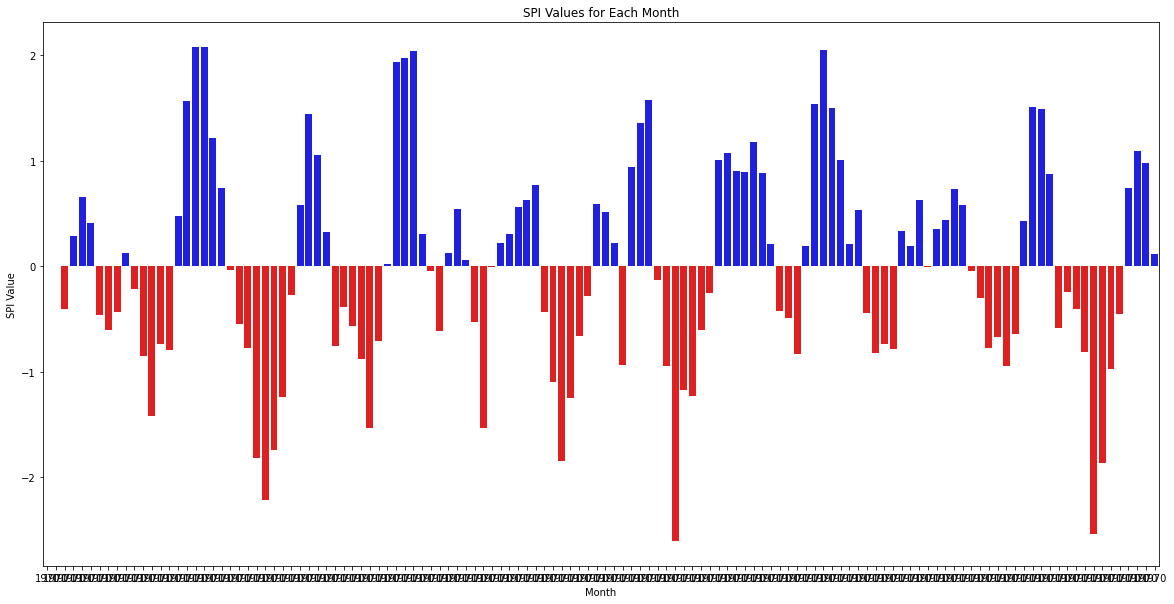

In [175]:
# Create a list of colors for each month based on the SPI value
colors = np.where(spi_data['SPI'] > 0, 'blue', 'red')

# Plot SPI values for each month
plt.figure(figsize=(20,10))
sns.barplot(x='Date', y='SPI', data=spi_data, palette=colors)
plt.xlabel('Month')
plt.ylabel('SPI Value')
plt.title('SPI Values for Each Month')

# Format x-axis to show date
date_form = mdates.DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.show()